In [1]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr

warnings.filterwarnings("ignore")

In [2]:
processed_data = pd.read_csv(
    "../data/processed/planosaude_processed.csv", sep=","
)

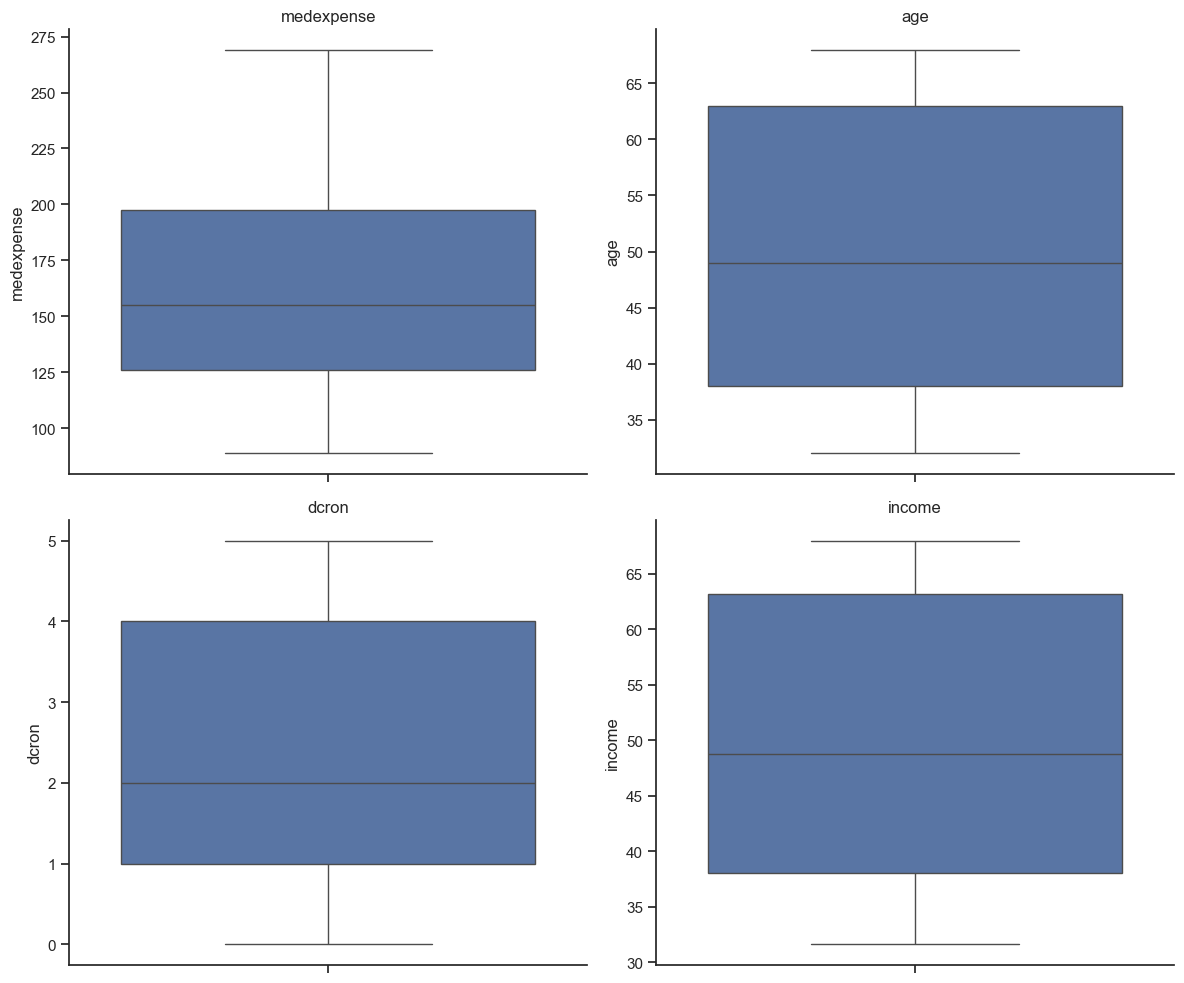

In [3]:
# Creating a chart with all boxplots from the continuous variables
custom_params1 = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params1)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.boxplot(data=processed_data["medexpense"], ax=axes[0, 0])
axes[0, 0].set_title("medexpense")

sns.boxplot(data=processed_data["age"], ax=axes[0, 1])
axes[0, 1].set_title("age")

sns.boxplot(data=processed_data["dcron"], ax=axes[1, 0])
axes[1, 0].set_title("dcron")

sns.boxplot(data=processed_data["income"], ax=axes[1, 1])
axes[1, 1].set_title("income")

plt.tight_layout()

plt.show()

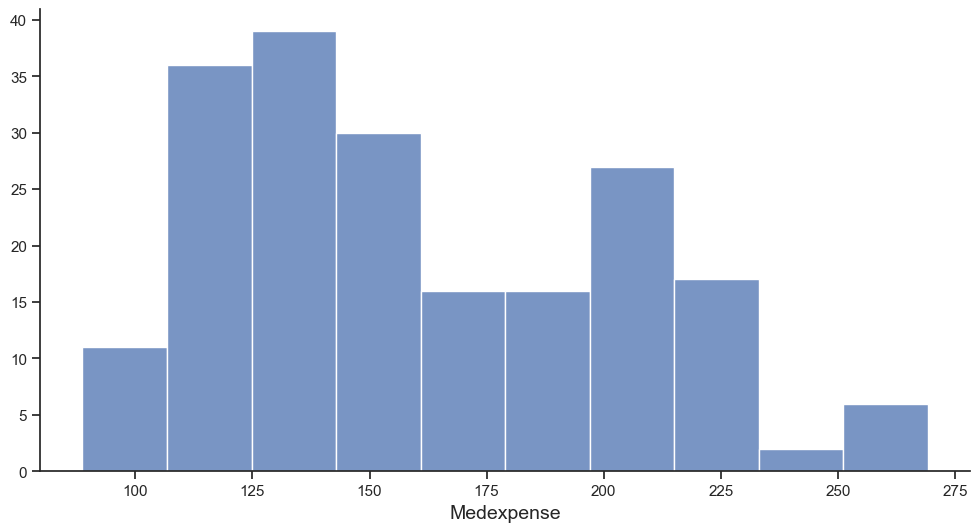

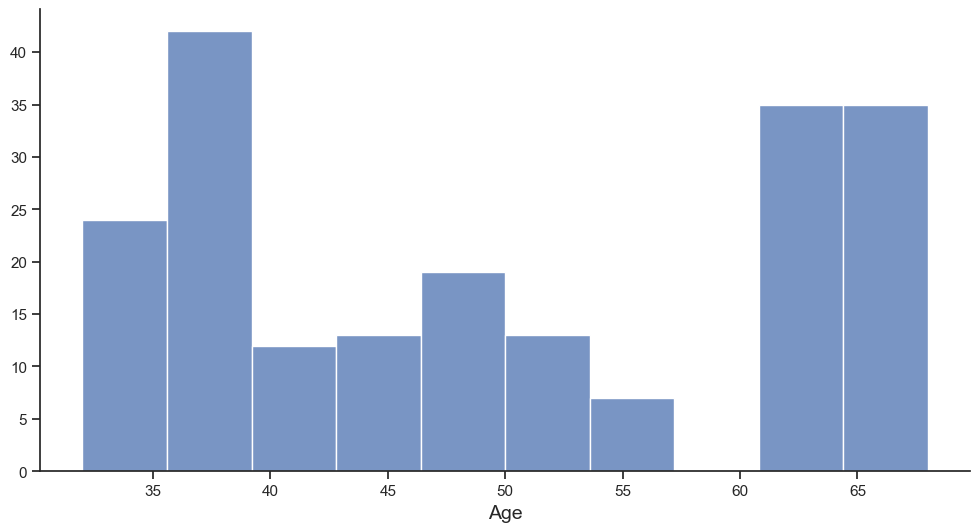

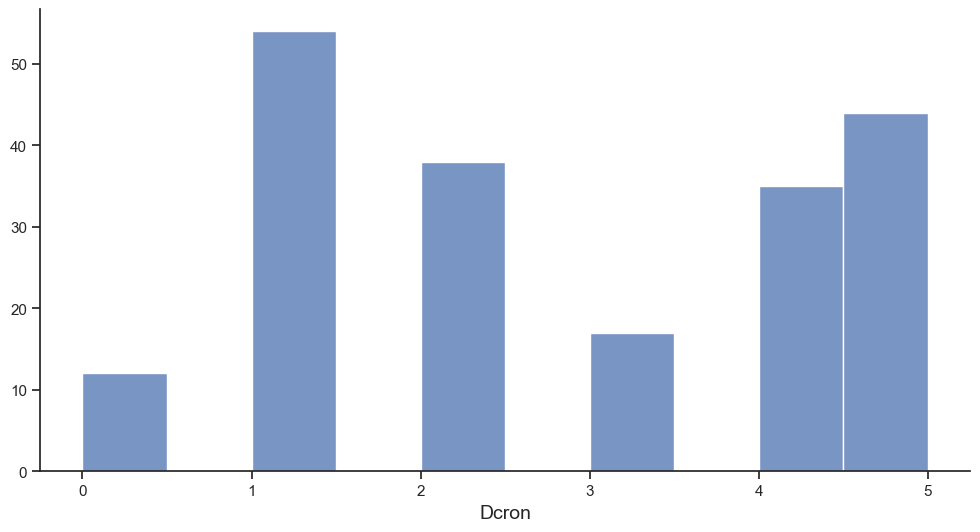

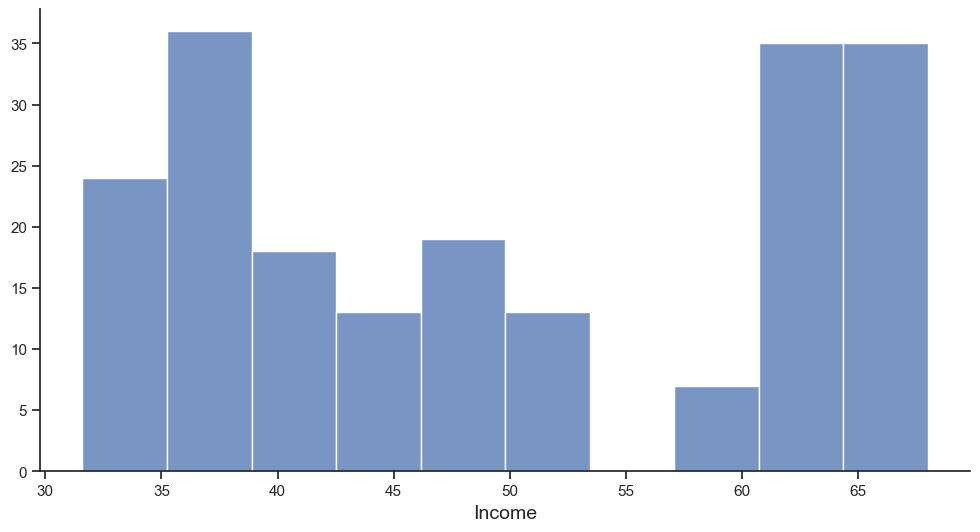

In [4]:
# Verifying the distribution with histograms
for column_name in processed_data.columns:
    if column_name not in ("id", "plan_emerald", "plan_golden"):
        plt.subplots(figsize=(12, 6))
        params = {"axes.spines.right": False, "axes.spines.top": False}
        ax = sns.histplot(processed_data[column_name], bins=10, kde=False)
        ax.set_xlabel(column_name.capitalize(), fontsize=14)
        ax.set_ylabel("")

<Figure size 1500x1000 with 0 Axes>

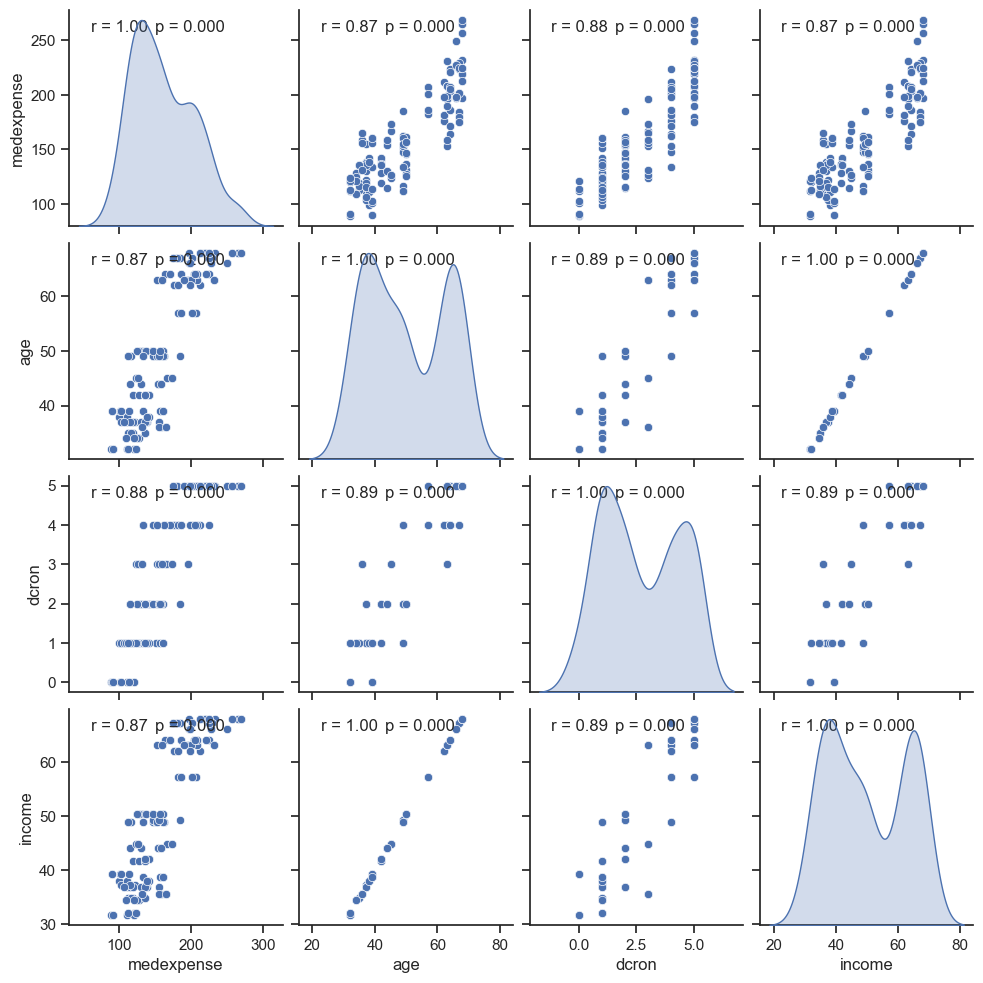

In [5]:
# Analysed correlation between all the available variables
def correlation(x, y, **kws):
    (r, p) = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f} ".format(r), xy=(0.1, 0.9), xycoords=ax.transAxes)
    ax.annotate("p = {:.3f}".format(p), xy=(0.4, 0.9), xycoords=ax.transAxes)


plt.figure(figsize=(15, 10))
graph = sns.pairplot(
    processed_data.loc[:, "medexpense":"income"],
    diag_kind="kde",
    palette="vlag",
)
graph.map(correlation)
plt.show()

<Axes: >

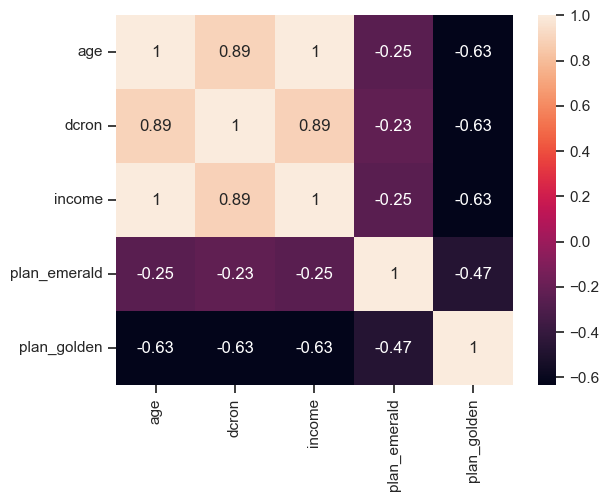

In [6]:
# Analysed correlation between the indepent variables
sns.heatmap(processed_data.iloc[:, 2:].corr(), annot=True)